In [2]:
import torch
from utils.spectrogram_dataset import SpectrogramDataset
from matplotlib import pyplot as plt
from torch import nn, optim

In [4]:
# The commented out inputs can still be included when creating the dataset
audio_config = {'feature': 'melspectrogram',
                # n_fft: 511
                # win_len:
                # hop_len:
                # normalize:
                'sample_rate': 22050,
                'min_duration': 1}

manifest_path = r"C:\Users\susan\Desktop\CE8\Deep Learning (DL)\avs8-840-deep-learning-mini-project\chunks_meta_dir\tr.csv" # Change this to your local path
labels_map = r"C:\Users\susan\Desktop\CE8\Deep Learning (DL)\avs8-840-deep-learning-mini-project\chunks_meta_dir\lbl_map.json" # Change this to your local path

In [7]:
# Make the dataset and dataloader
dataset = SpectrogramDataset(manifest_path, labels_map, audio_config)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

100%|██████████| 520966/520966 [00:17<00:00, 30013.69it/s]


torch.Size([520966, 200])


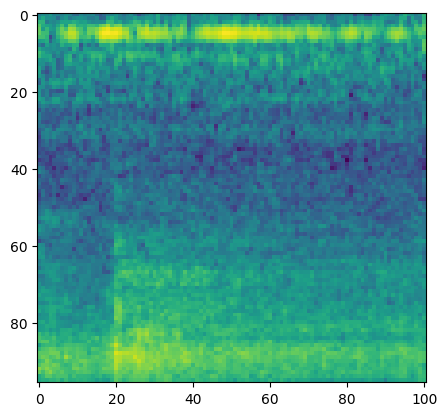

torch.Size([1, 1, 96, 101])


TypeError: savefig() takes 2 positional arguments but 3 were given

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot a random element of the dataset
spectrogram, target = next(iter(dataloader))
#print(spectrogram.shape)
plt.imshow(spectrogram[0])
plt.savefig('spectrogram_figure.png')
plt.show()

# Add the channels dimension which is missing and usually expected from vision transformers
input = spectrogram.expand(1, -1, -1, -1) # Create an extra empty dimension
input = input.permute(1, 0, 2, 3) # Permute so we have Batch - Channel - Width - Height
input = input.to(device)
print(input.shape)


In [10]:
from KWT import KWT
# Input arguments to Holger's vision transformer. The commented out lines can still be added but are optional.
# The input resolution needs to match the spectrogram. Either change the dataset to match the model or the model to match the dataset.
# The patch res needs to divide the input resolution.
model_harams = {
        'input_res': [96, 101],
        'patch_res': [96, 1],
        'num_classes': 3,
        'mlp_dim': 256,
        'dim': 64,
        'heads': 1,
        'depth': 12
        # dropout: 0.0
        # emb_dropout: 0.1
        # pre_norm: False
        # pool: mean
}
# Create the model
model = KWT(**model_harams)
model.to(device);